# Task 6.3. Linear filters (high pass) - 3.1 - 3.7
---
***Author: Piotr Skalski***

## Imports

In [17]:
import numpy as np
import cv2
import os

import display_util

import matplotlib.pyplot as plt
%matplotlib inline

## Settings

In [2]:
SOURCE_DIR = "./../data/"
IMAGE_NAME = "moon.bmp"

## Loading image

In [3]:
# building path to file
image_path = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = cv2.imread(image_path, 0)

## Display image

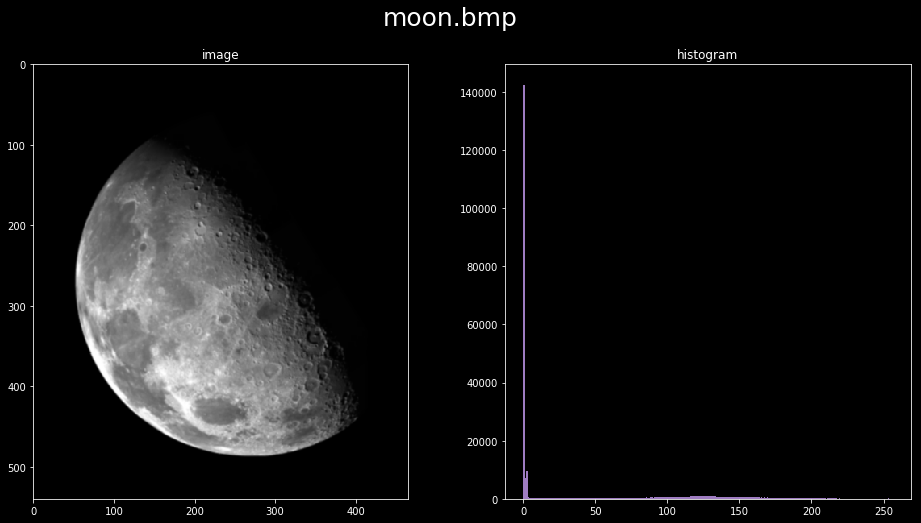

In [4]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('moon.bmp', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.set_title("histogram")

plt.show()

## Using built-in Laplacian function

In [9]:
output_image = cv2.Laplacian(image, cv2.CV_64F)

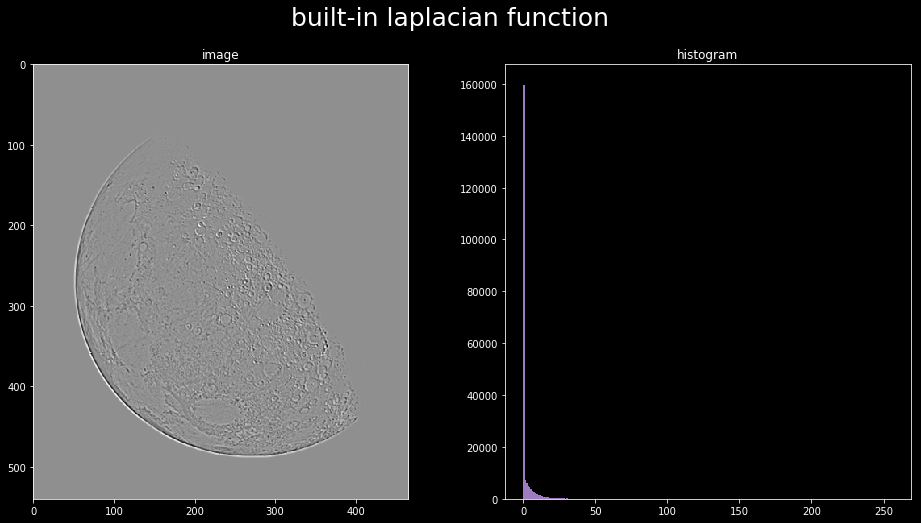

In [15]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('built-in laplacian function', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(output_image, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(output_image.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.set_title("histogram")

plt.show()

## Own Laplacian implementation

### Settings

In [11]:
KERNEL = np.array([
    [0, 1, 0], 
    [1, -4, 1], 
    [0, 1, 0]
])
KERNEL = KERNEL/9

### Implementation

In [12]:
intermediate_image = cv2.filter2D(image, -1, KERNEL)
output_image_v1 = np.copy(intermediate_image) + 128
output_image_v2 = np.abs(np.copy(intermediate_image))

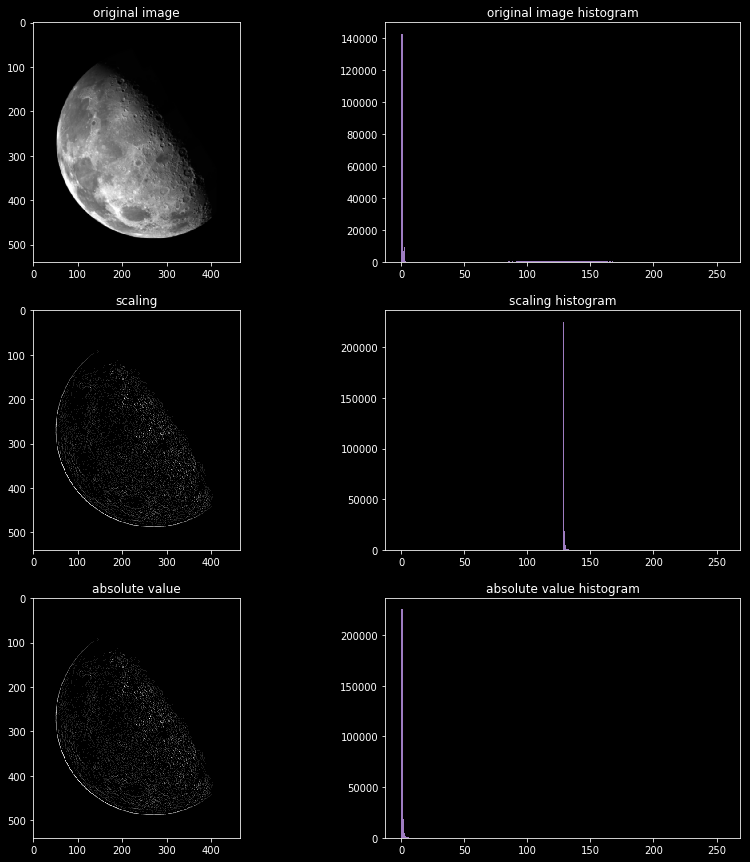

In [14]:
images_to_display = [
    image,
    output_image_v1,
    output_image_v2
]

names = [
    "original image",
    "scaling",
    "absolute value"
]

display_util.images_with_histograms(files_list=images_to_display, names_list=names)

## Resources

1. [Image edge detection: Sobel and Laplacian](https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Gradient_Sobel_Laplacian_Derivatives_Edge_Detection.php)
1. [Laplace Operator](https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html)